In [1]:
import pandas as pd
df_BF=pd.read_csv("/content/TMT_12MM_BF_Route.csv",index_col=False)
df_BF

,Date,Price
0,5/30/2020,38200
1,6/6/2020,37700
2,6/13/2020,37000
3,6/20/2020,36500
4,6/27/2020,36500
...,...,...
253,3/28/2025,56800
254,4/4/2025,57800
255,4/11/2025,58300
256,4/18/2025,58000


In [2]:
import pandas as pd
df_IF=pd.read_csv("/content/TMT_12MM_IF_Route.csv",index_col=False)
df_IF

,Date,Price
0,5/30/2020,36300
1,6/1/2020,36600
2,6/2/2020,37100
3,6/3/2020,37100
4,6/4/2020,36700
...,...,...
1491,4/26/2025,48100
1492,4/28/2025,47800
1493,4/29/2025,47800
1494,4/30/2025,47300


In [3]:
df_IF.columns
df_BF.columns

Index(['Date', 'Price '], dtype='object')

In [4]:
df_BF['Date']=pd.to_datetime(df_BF['Date'])
df_IF['Date']=pd.to_datetime(df_IF['Date'])

In [5]:
df_BF['Price ']=pd.to_numeric(df_BF['Price '])
df_IF['Price ']=pd.to_numeric(df_IF['Price '])

In [6]:
print(df_BF.isnull().sum())
print(df_IF.isnull().sum())

Date      0
Price     0
dtype: int64
Date      0
Price     0
dtype: int64


PREDICTION FOR LAST 6 MONTHS

In [7]:
split_date = df_BF['Date'].max() - pd.DateOffset(months=6)
train_df_BF = df_BF[df_BF['Date'] < split_date].copy()
test_df_BF = df_BF[df_BF['Date'] >= split_date].copy()
print("Train date and price:")
print(train_df_BF.head())
print("Train date and price:")
print(train_df_BF.tail())
print("Test date and price:")
print(test_df_BF.head())
print("Test date and price:")
print(test_df_BF.tail())


Train date and price:
        Date  Price 
0 2020-05-30   38200
1 2020-06-06   37700
2 2020-06-13   37000
3 2020-06-20   36500
4 2020-06-27   36500
Train date and price:
          Date  Price 
227 2024-09-20   50700
228 2024-09-27   51200
229 2024-10-04   53500
230 2024-10-11   54500
231 2024-10-18   54900
Test date and price:
          Date  Price 
232 2024-10-25   55000
233 2024-11-08   55300
234 2024-11-15   55100
235 2024-11-22   54900
236 2024-11-29   53800
Test date and price:
          Date  Price 
253 2025-03-28   56800
254 2025-04-04   57800
255 2025-04-11   58300
256 2025-04-18   58000
257 2025-04-25   57400


In [8]:
split_date = df_IF['Date'].max() - pd.DateOffset(months=6)
train_df_IF = df_IF[df_IF['Date'] < split_date].copy()
test_df_IF = df_IF[df_IF['Date'] >= split_date].copy()
print("Train date and price:")
print(train_df_IF.head())
print("Train date and price:")
print(train_df_IF.tail())
print("Test date and price:")
print(test_df_IF.head())
print("Test date and price:")
print(test_df_IF.tail())


Train date and price:
        Date  Price 
0 2020-05-30   36300
1 2020-06-01   36600
2 2020-06-02   37100
3 2020-06-03   37100
4 2020-06-04   36700
Train date and price:
           Date  Price 
1339 2024-10-25   46800
1340 2024-10-26   46400
1341 2024-10-28   46000
1342 2024-10-29   46000
1343 2024-10-30   45800
Test date and price:
           Date  Price 
1344 2024-11-02   45700
1345 2024-11-04   45500
1346 2024-11-05   45700
1347 2024-11-06   46000
1348 2024-11-07   46200
Test date and price:
           Date  Price 
1491 2025-04-26   48100
1492 2025-04-28   47800
1493 2025-04-29   47800
1494 2025-04-30   47300
1495 2025-05-01   47500


In [9]:
train_df_IF['DayIndex'] = (train_df_IF['Date'] - train_df_IF['Date'].min()).dt.days
test_df_IF['DayIndex'] = (test_df_IF['Date'] - train_df_IF['Date'].min()).dt.days

train_df_BF['DayIndex'] = (train_df_BF['Date'] - train_df_BF['Date'].min()).dt.days
test_df_BF['DayIndex'] = (test_df_BF['Date'] - train_df_BF['Date'].min()).dt.days



In [10]:
df_BF['Lag1'] = df_BF['Price '].shift(1)
df_BF.dropna(inplace=True)

In [11]:
df_IF['Lag1'] = df_IF['Price '].shift(1)
df_IF.dropna(inplace=True)

In [12]:
from sklearn.model_selection import train_test_split
train_df_BF, val_df_BF = train_test_split(train_df_BF, test_size=0.2, shuffle=False)
train_df_IF, val_df_IF = train_test_split(train_df_IF, test_size=0.2, shuffle=False)


In [13]:
from sklearn.ensemble import RandomForestRegressor

#BF ROUTE
train_df_BF['Lag1'] = train_df_BF['Price '].shift(1)
train_df_BF.dropna(inplace=True)


features = ['DayIndex', 'Lag1']
target = 'Price '

model= RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_df_BF[features], train_df_BF[target])

RandomForestRegressor(random_state=42)

In [14]:
from sklearn.ensemble import RandomForestRegressor

#IF ROUTE
train_df_IF['Lag1'] = train_df_IF['Price '].shift(1)
train_df_BF.dropna(inplace=True)


features = ['DayIndex', 'Lag1']
target = 'Price '

model= RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_df_IF[features], train_df_IF[target])

RandomForestRegressor(random_state=42)

In [15]:
# Recalculate 'Lag1' on validation sets after the split
val_df_BF['Lag1'] = val_df_BF['Price '].shift(1)
val_df_BF.dropna(inplace=True) # Drop rows with NaN in 'Lag1'

val_df_IF['Lag1'] = val_df_IF['Price '].shift(1)
val_df_IF.dropna(inplace=True) # Drop rows with NaN in 'Lag1'

In [16]:
val_df_BF['Predicted_Price'] = model.predict(val_df_BF[features])
val_df_IF['Predicted_Price'] = model.predict(val_df_IF[features])


In [17]:
print(val_df_IF['Predicted_Price'])

1076    46904.0
1077    46714.0
1078    46736.0
1079    46780.0
1080    46780.0
         ...   
1339    46879.0
1340    46714.0
1341    46502.0
1342    46249.0
1343    46249.0
Name: Predicted_Price, Length: 268, dtype: float64


In [18]:
print(val_df_BF['Predicted_Price'])

186    54922.0
187    54564.0
188    53264.0
189    53140.0
190    52410.0
191    52315.0
192    51657.0
193    51260.0
194    51602.0
195    51657.0
196    51907.0
197    51260.0
198    51237.0
199    51237.0
200    51260.0
201    51914.0
202    51907.0
203    51907.0
204    52406.0
205    53075.0
206    55102.0
207    56325.5
208    58179.0
209    58530.0
210    57870.0
211    57716.0
212    57716.0
213    58193.0
214    57729.0
215    57732.0
216    56549.5
217    55706.0
218    54564.0
219    52428.0
220    51914.0
221    51483.0
222    50514.0
223    50319.0
224    49471.0
225    50319.0
226    50514.0
227    50514.0
228    50620.0
229    51013.0
230    53123.0
231    54301.0
Name: Predicted_Price, dtype: float64


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

#BF ROUTE
print("Validation R² BF:", r2_score(val_df_BF[target], val_df_BF['Predicted_Price']))
print("Validation MAE BF:", mean_absolute_error(val_df_BF[target], val_df_BF['Predicted_Price']))
print("Validation RMSE BF:", np.sqrt(mean_squared_error(val_df_BF[target], val_df_BF['Predicted_Price'])))

#IF ROUTE
print("Validation R² IF:", r2_score(val_df_IF[target], val_df_IF['Predicted_Price']))
print("Validation MAE IF:", mean_absolute_error(val_df_IF[target], val_df_IF['Predicted_Price']))
print("Validation RMSE IF:", np.sqrt(mean_squared_error(val_df_IF[target], val_df_IF['Predicted_Price'])))


Validation R² BF: 0.898069385202935
Validation MAE BF: 631.5
Validation RMSE BF: 870.4505018017719
Validation R² IF: 0.9641973576099118
Validation MAE IF: 296.39179104477614
Validation RMSE IF: 400.38805337270253


In [20]:
test_df_BF['Lag1']=test_df_BF['Price '].shift(1)
test_df_BF.dropna(inplace=True)

test_df_IF['Lag1']=test_df_IF['Price '].shift(1)
test_df_IF.dropna(inplace=True)



In [21]:
#prediction
test_df_BF['Predicted_Price']=model.predict(test_df_BF[features])
test_df_IF['Predicted_Price']=model.predict(test_df_IF[features])

In [22]:
#EVALUATE TEST PERFORMANCE

#BF ROUTE
mae = mean_absolute_error(test_df_BF['Price '],test_df_BF['Predicted_Price'])
rmse = np.sqrt(mean_squared_error(test_df_BF['Price '],test_df_BF['Predicted_Price']))
r2 = r2_score(test_df_BF['Price '],test_df_BF['Predicted_Price'])

print("Test MAE BF:", mae)
print("Test RMSE BF:", rmse)
print("Test R² Score BF:", r2)

#IF ROUTE
mae = mean_absolute_error(test_df_IF['Price '],test_df_IF['Predicted_Price'])
rmse = np.sqrt(mean_squared_error(test_df_IF['Price '],test_df_IF['Predicted_Price']))
r2 = r2_score(test_df_IF['Price '],test_df_IF['Predicted_Price'])

print("Test MAE IF:", mae)
print("Test RMSE IF:", rmse)
print("Test R² Score IF:", r2)


Test MAE BF: 581.6
Test RMSE BF: 749.6436353361509
Test R² Score BF: 0.8947648918671125
Test MAE IF: 356.3973509933775
Test RMSE IF: 429.67125890438246
Test R² Score IF: 0.915618556551825


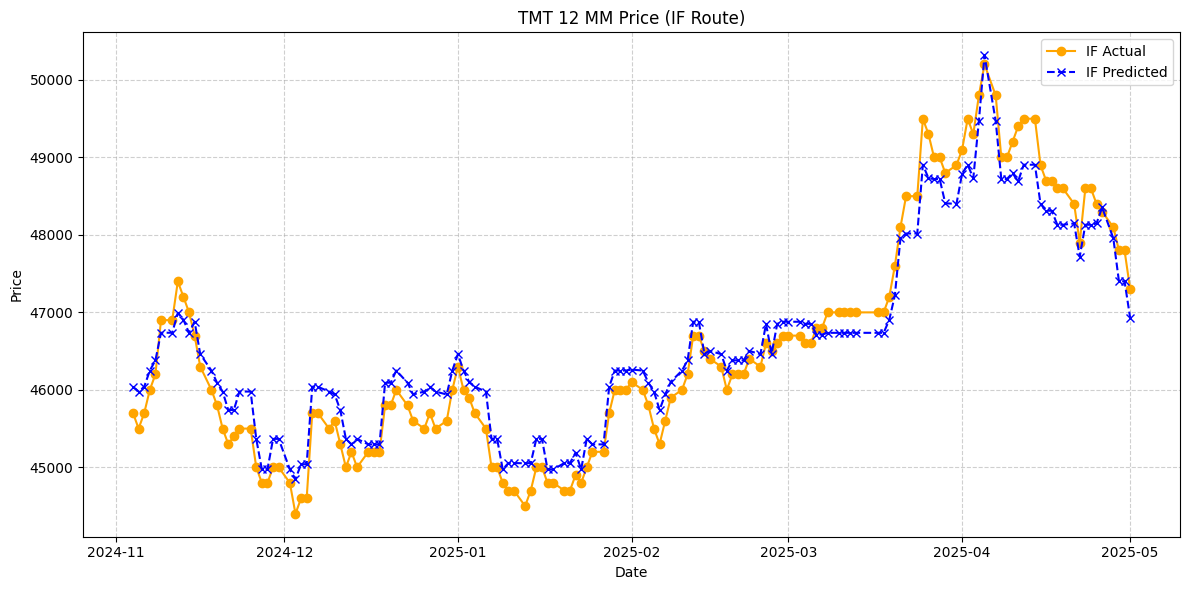

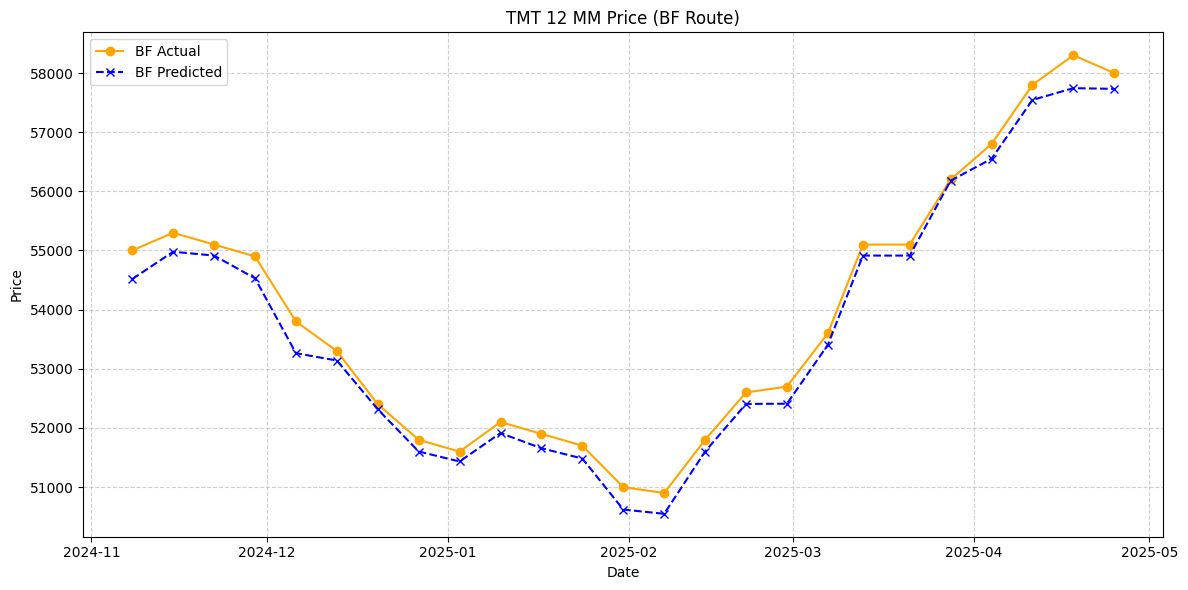

In [23]:
import matplotlib.pyplot as plt

# IF Plot
plt.figure(figsize=(12, 6))
plt.plot(test_df_IF['Date'], test_df_IF['Lag1'].values, label='IF Actual', color="orange", marker='o')
plt.plot(test_df_IF['Date'], test_df_IF['Predicted_Price'], label='IF Predicted', color="blue", linestyle='--', marker='x')
plt.title('TMT 12 MM Price (IF Route)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True,linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

# BF Plot
plt.figure(figsize=(12, 6))
plt.plot(test_df_BF['Date'], test_df_BF['Lag1'].values, label='BF Actual', color="orange", marker='o')
plt.plot(test_df_BF['Date'], test_df_BF['Predicted_Price'], label='BF Predicted', color="blue", linestyle='--', marker='x')
plt.title('TMT 12 MM Price (BF Route)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True,linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()


In [24]:
merged=pd.merge(test_df_IF[['Date','Predicted_Price']].rename(columns={'Predicted_Price':'Pred_IF'}),
                test_df_BF[['Date','Predicted_Price']].rename(columns={'Predicted_Price':'Pred_BF'}),
                on='Date')
correlation=merged['Pred_IF'].corr(merged['Pred_BF'])
print("Correlation between Predicted Prices(IF vs BF):", round(correlation,3))

Correlation between Predicted Prices(IF vs BF): 0.757


PREDICTION FOR NEXT 7 DAYS, 30 DAYS, 60 DAYS USING LAST 6 MONTHS PREDICTION

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/


Random Forest Next 7 Days Prediction (BF Route):
        Date  Predicted_Price_RF
0 2025-04-26             57241.0
1 2025-04-27             57007.0
2 2025-04-28             56683.5
3 2025-04-29             56682.5
4 2025-04-30             56682.5
5 2025-05-01             56682.5
6 2025-05-02             56682.5

Random Forest Next 7 Days Prediction (IF Route):
        Date  Predicted_Price_RF
0 2025-05-02             46739.0
1 2025-05-03             46824.0
2 2025-05-04             46714.0
3 2025-05-05             46824.0
4 2025-05-06             46714.0
5 2025-05-07             46824.0
6 2025-05-08             46714.0


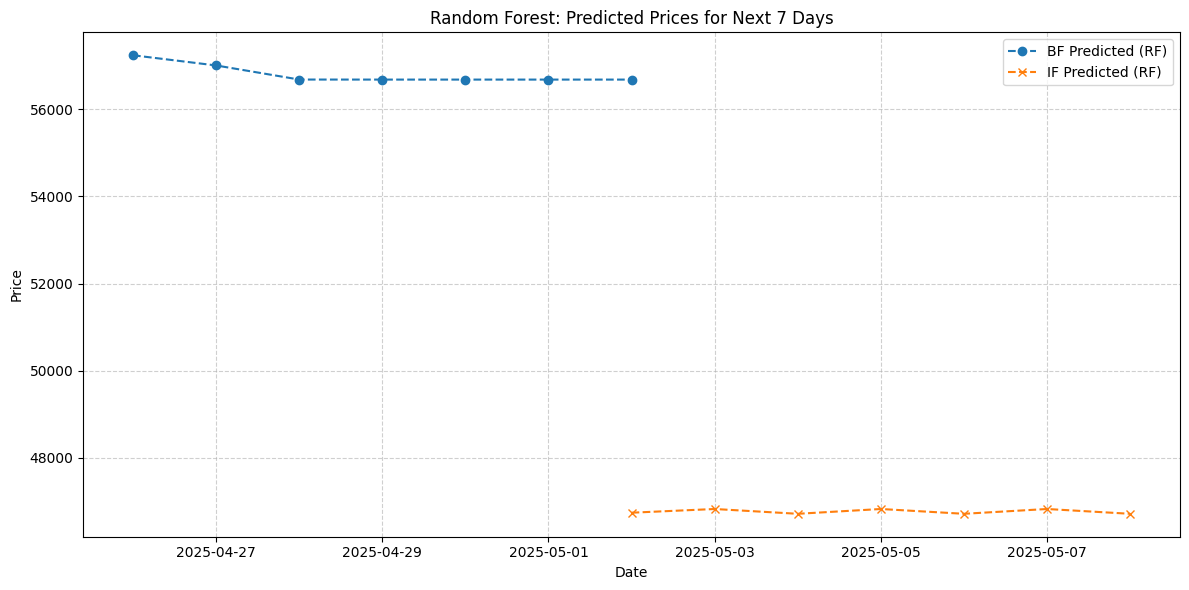

In [25]:
# perform the next 7 days prediction using the last 6 months' predicted data, and apply both models for this.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Function to predict next n days using the Random Forest model
def predict_future_rf(model, last_date_in_data, last_predicted_price, days_to_predict, df_train_min_date):
  future_dates = pd.date_range(start=last_date_in_data + pd.Timedelta(days=1), periods=days_to_predict, freq='D')
  future_predictions = []
  current_price = last_predicted_price

  for i in range(days_to_predict):
    current_date = future_dates[i]
    day_index = (current_date - df_train_min_date).days

    features_data = np.array([[day_index, current_price]])
    predicted_price = model.predict(features_data)[0]
    future_predictions.append(predicted_price)
    current_price = predicted_price

  return future_dates, future_predictions

last_date_bf_rf = test_df_BF['Date'].max()
last_predicted_price_bf_rf = test_df_BF['Predicted_Price'].iloc[-1]

last_date_if_rf = test_df_IF['Date'].max()
last_predicted_price_if_rf = test_df_IF['Predicted_Price'].iloc[-1]

# Predict next 7 days for BF using Random Forest
future_dates_bf_rf, future_predictions_bf_rf = predict_future_rf(model, last_date_bf_rf, last_predicted_price_bf_rf, 7, train_df_BF['Date'].min())
future_df_bf_rf = pd.DataFrame({'Date': future_dates_bf_rf, 'Predicted_Price_RF': future_predictions_bf_rf})

# Predict next 7 days for IF using Random Forest
future_dates_if_rf, future_predictions_if_rf = predict_future_rf(model, last_date_if_rf, last_predicted_price_if_rf, 7, train_df_IF['Date'].min())
future_df_if_rf = pd.DataFrame({'Date': future_dates_if_rf, 'Predicted_Price_RF': future_predictions_if_rf})

print("\nRandom Forest Next 7 Days Prediction (BF Route):")
print(future_df_bf_rf)

print("\nRandom Forest Next 7 Days Prediction (IF Route):")
print(future_df_if_rf)



# Plotting the next 7 days predictions
plt.figure(figsize=(12, 6))
plt.plot(future_df_bf_rf['Date'], future_df_bf_rf['Predicted_Price_RF'], label='BF Predicted (RF)', marker='o', linestyle='--')
plt.plot(future_df_if_rf['Date'], future_df_if_rf['Predicted_Price_RF'], label='IF Predicted (RF)', marker='x', linestyle='--')
plt.title('Random Forest: Predicted Prices for Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True,linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/


Random Forest Next 30 Days Prediction (BF Route):
         Date  Predicted_Price_RF
0  2025-04-26             57241.0
1  2025-04-27             57007.0
2  2025-04-28             56683.5
3  2025-04-29             56682.5
4  2025-04-30             56682.5
5  2025-05-01             56682.5
6  2025-05-02             56682.5
7  2025-05-03             56682.5
8  2025-05-04             56682.5
9  2025-05-05             56682.5
10 2025-05-06             56682.5
11 2025-05-07             56682.5
12 2025-05-08             56682.5
13 2025-05-09             56682.5
14 2025-05-10             56682.5
15 2025-05-11             56682.5
16 2025-05-12             56682.5
17 2025-05-13             56682.5
18 2025-05-14             56682.5
19 2025-05-15             56682.5
20 2025-05-16             56682.5
21 2025-05-17             56682.5
22 2025-05-18             56682.5
23 2025-05-19             56682.5
24 2025-05-20             56682.5
25 2025-05-21             56682.5
26 2025-05-22             56682

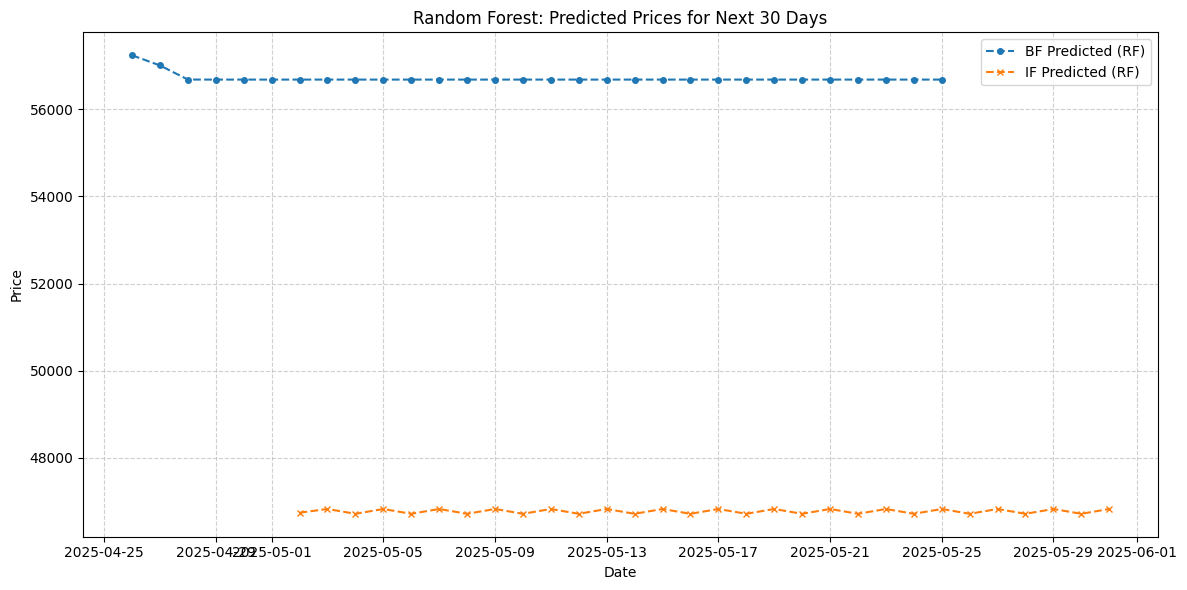

In [26]:
# now, perform the next 30 days prediction using the last 6 months' predicted data, and apply both models for this.

import pandas as pd
import matplotlib.pyplot as plt
# Now, extend the prediction for the next 30 days using the last 6 months' predicted data
# We will continue the iterative prediction using the last predicted values as input.

days_to_predict_30 = 30

# Function to predict next n days using the Random Forest model (reusing the previous function)
# predict_future_rf function already defined above.

# Get the last date and last predicted price from the last 6 months test set for RF
# These are already available from the previous test predictions
last_date_bf_rf = test_df_BF['Date'].max()
last_predicted_price_bf_rf = test_df_BF['Predicted_Price'].iloc[-1]

last_date_if_rf = test_df_IF['Date'].max()
last_predicted_price_if_rf = test_df_IF['Predicted_Price'].iloc[-1]

# Predict next 30 days for BF using Random Forest, starting from the last predicted day in the test set
future_dates_bf_rf_30, future_predictions_bf_rf_30 = predict_future_rf(model, last_date_bf_rf, last_predicted_price_bf_rf, days_to_predict_30, train_df_BF['Date'].min())
future_df_bf_rf_30 = pd.DataFrame({'Date': future_dates_bf_rf_30, 'Predicted_Price_RF': future_predictions_bf_rf_30})

# Predict next 30 days for IF using Random Forest, starting from the last predicted day in the test set
future_dates_if_rf_30, future_predictions_if_rf_30 = predict_future_rf(model, last_date_if_rf, last_predicted_price_if_rf, days_to_predict_30, train_df_IF['Date'].min())
future_df_if_rf_30 = pd.DataFrame({'Date': future_dates_if_rf_30, 'Predicted_Price_RF': future_predictions_if_rf_30})

print("\nRandom Forest Next 30 Days Prediction (BF Route):")
print(future_df_bf_rf_30)



print("\nRandom Forest Next 30 Days Prediction (IF Route):")
print(future_df_if_rf_30)

# Plotting the next 30 days predictions
plt.figure(figsize=(12, 6))
plt.plot(future_df_bf_rf_30['Date'], future_df_bf_rf_30['Predicted_Price_RF'], label='BF Predicted (RF)', marker='o', linestyle='--', markersize=4)
plt.plot(future_df_if_rf_30['Date'], future_df_if_rf_30['Predicted_Price_RF'], label='IF Predicted (RF)', marker='x', linestyle='--', markersize=4)
plt.title('Random Forest: Predicted Prices for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True,linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/


Random Forest Next 60 Days Prediction (BF Route):
         Date  Predicted_Price_RF
0  2025-04-26             57241.0
1  2025-04-27             57007.0
2  2025-04-28             56683.5
3  2025-04-29             56682.5
4  2025-04-30             56682.5
5  2025-05-01             56682.5
6  2025-05-02             56682.5
7  2025-05-03             56682.5
8  2025-05-04             56682.5
9  2025-05-05             56682.5
10 2025-05-06             56682.5
11 2025-05-07             56682.5
12 2025-05-08             56682.5
13 2025-05-09             56682.5
14 2025-05-10             56682.5
15 2025-05-11             56682.5
16 2025-05-12             56682.5
17 2025-05-13             56682.5
18 2025-05-14             56682.5
19 2025-05-15             56682.5
20 2025-05-16             56682.5
21 2025-05-17             56682.5
22 2025-05-18             56682.5
23 2025-05-19             56682.5
24 2025-05-20             56682.5
25 2025-05-21             56682.5
26 2025-05-22             56682

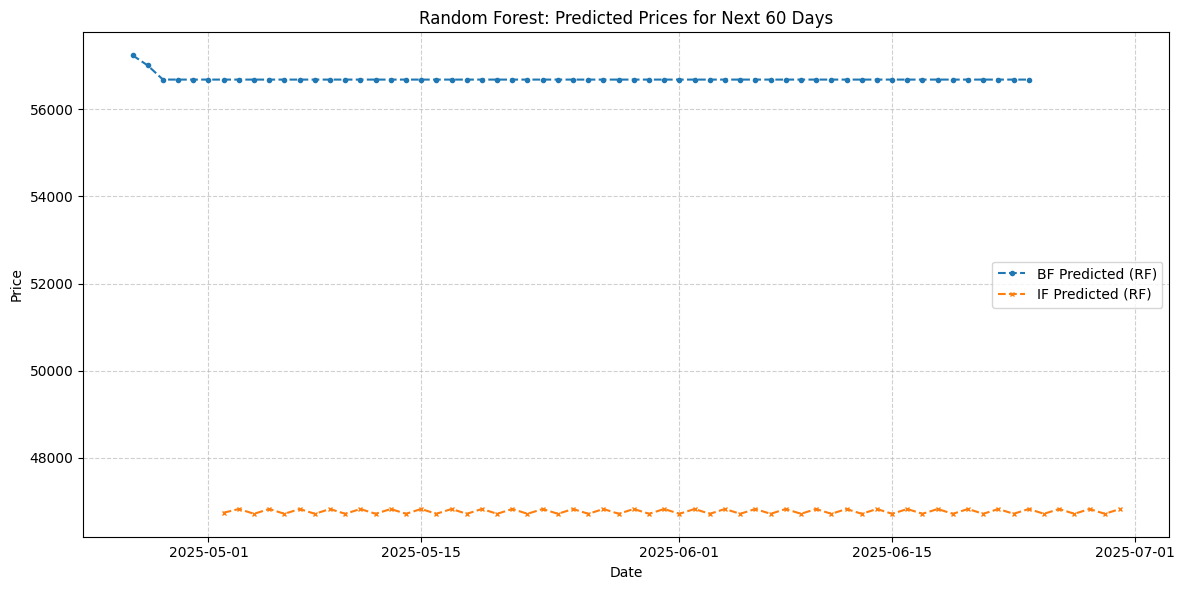

In [27]:
# Now, perform next 60 days prediction using the last 6 months' predicted data, and apply both models for this

import pandas as pd
import matplotlib.pyplot as plt
# Predict next 60 days using the last 6 months' predicted data

days_to_predict_60 = 60

# Random Forest Prediction for Next 60 Days
# We continue predicting from the last date of the 6-month test set
# The predict_future_rf function uses the last known price as the starting point for the lag feature.
# We need to make sure we are using the *predicted* price from the end of the 6-month test set.

# Get the last date and last predicted price from the last 6 months test set for RF
last_date_bf_rf = test_df_BF['Date'].max()
last_predicted_price_bf_rf = test_df_BF['Predicted_Price'].iloc[-1]

last_date_if_rf = test_df_IF['Date'].max()
last_predicted_price_if_rf = test_df_IF['Predicted_Price'].iloc[-1]

# Predict next 60 days for BF using Random Forest
future_dates_bf_rf_60, future_predictions_bf_rf_60 = predict_future_rf(model, last_date_bf_rf, last_predicted_price_bf_rf, days_to_predict_60, train_df_BF['Date'].min())
future_df_bf_rf_60 = pd.DataFrame({'Date': future_dates_bf_rf_60, 'Predicted_Price_RF': future_predictions_bf_rf_60})

# Predict next 60 days for IF using Random Forest
future_dates_if_rf_60, future_predictions_if_rf_60 = predict_future_rf(model, last_date_if_rf, last_predicted_price_if_rf, days_to_predict_60, train_df_IF['Date'].min())
future_df_if_rf_60 = pd.DataFrame({'Date': future_dates_if_rf_60, 'Predicted_Price_RF': future_predictions_if_rf_60})

print("\nRandom Forest Next 60 Days Prediction (BF Route):")
print(future_df_bf_rf_60)

print("\nRandom Forest Next 60 Days Prediction (IF Route):")
print(future_df_if_rf_60)



# Plotting the next 60 days predictions
plt.figure(figsize=(12, 6))
plt.plot(future_df_bf_rf_60['Date'], future_df_bf_rf_60['Predicted_Price_RF'], label='BF Predicted (RF)', marker='o', linestyle='--', markersize=3)
plt.plot(future_df_if_rf_60['Date'], future_df_if_rf_60['Predicted_Price_RF'], label='IF Predicted (RF)', marker='x', linestyle='--', markersize=3)
plt.title('Random Forest: Predicted Prices for Next 60 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True,linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()




MONTHLY COMPARISON

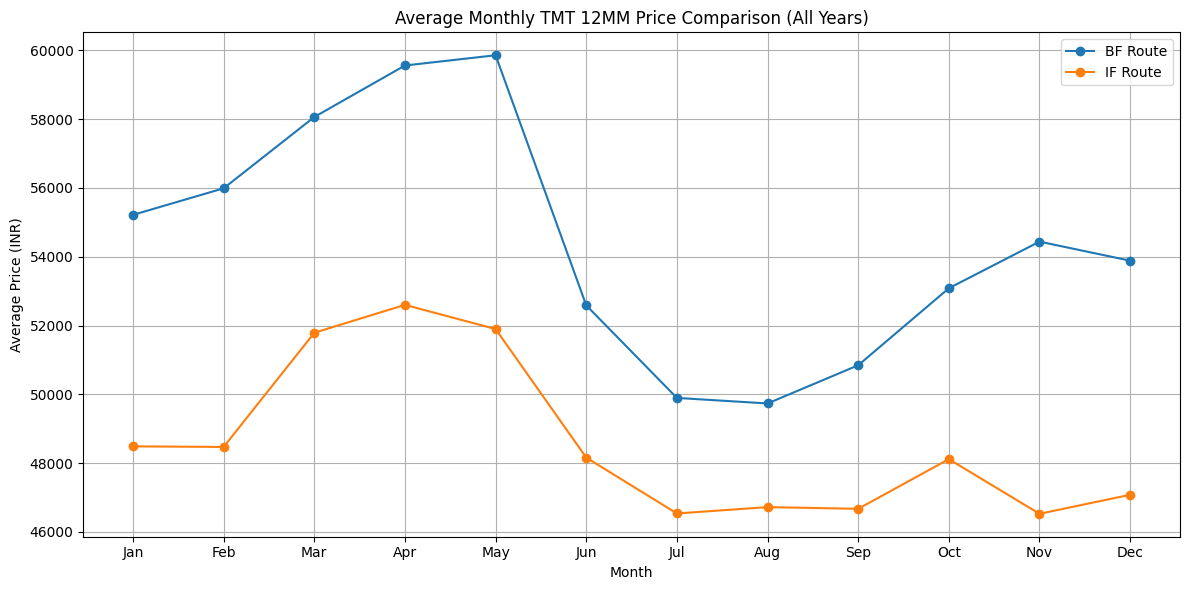

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Combine the dataframes for easier processing
df_combined = pd.concat([df_BF.assign(Route='BF'), df_IF.assign(Route='IF')])

# Extract month and year
df_combined['Year'] = df_combined['Date'].dt.year
df_combined['Month'] = df_combined['Date'].dt.month

# Calculate average price for each month, year, and route
monthly_avg_price = df_combined.groupby(['Year', 'Month', 'Route'])['Price '].mean().reset_index()

# Calculate the average price for each month across all years for each route
overall_monthly_avg_price = monthly_avg_price.groupby(['Month', 'Route'])['Price '].mean().reset_index()

# Pivot the table for easier plotting
pivot_avg_price = overall_monthly_avg_price.pivot(index='Month', columns='Route', values='Price ')

# Plotting the graph
plt.figure(figsize=(12, 6))
for route in pivot_avg_price.columns:
    plt.plot(pivot_avg_price.index, pivot_avg_price[route], marker='o', label=f'{route} Route')

plt.title('Average Monthly TMT 12MM Price Comparison (All Years)')
plt.xlabel('Month')
plt.ylabel('Average Price (INR)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

MONTHLY PRICE DIFFERENCES

In [ ]:

# Prepare data for Excel output
# Calculate the difference in average prices
pivot_avg_price['Difference (BF - IF)'] = pivot_avg_price['BF'] - pivot_avg_price['IF']

# Reset index to have 'Month' as a column
excel_df = pivot_avg_price.reset_index()

# Add month names
excel_df['Month Name'] = excel_df['Month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%B'))

# Reorder columns
excel_df = excel_df[['Month Name', 'BF', 'IF', 'Difference (BF - IF)']]

# Rename columns for clarity
excel_df.rename(columns={'BF': 'Average Price (BF Route)', 'IF': 'Average Price (IF Route)'}, inplace=True)

# Save to Excel
excel_output_path = '/content/Monthly_Price_Difference.xlsx'
excel_df.to_excel(excel_output_path, index=False)

print(f"Excel file saved to: {excel_output_path}")

/tmp/ipython-input-56-4078210951.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  excel_df.rename(columns={'BF': 'Average Price (BF Route)', 'IF': 'Average Price (IF Route)'}, inplace=True)


Excel file saved to: /content/Monthly_Price_Difference.xlsx


In [ ]:
Monthly_Price_Difference=pd.read_excel('/content/Monthly_Price_Difference.xlsx')
Monthly_Price_Difference

,Month Name,Average Price (BF Route),Average Price (IF Route),Difference (BF - IF)
0,January,55218.000000,48488.953846,6729.046154
1,February,55990.000000,48471.666667,7518.333333
2,March,58063.000000,51790.700000,6272.300000
3,April,59560.000000,52601.938462,6958.061538
4,May,59857.500000,51899.202279,7958.297721
5,June,52587.000000,48161.938462,4425.061538
6,July,49897.000000,46538.034188,3358.965812
7,August,49736.000000,46722.735897,3013.264103
8,September,50846.000000,46673.676923,4172.323077
9,October,53085.000000,48117.378763,4967.621237
